In [1]:
import networkx as nx
import re
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import os
import numpy as np
import pandas as pd
from networkx.algorithms.shortest_paths.generic import shortest_path_length
from scipy.linalg import svd
from scipy.stats import entropy
from scipy.misc import comb
from itertools import product, combinations
import multiprocessing as mp

In [2]:
def read_file(filename):
    with open(filename, 'r') as f:
        doc = f.read()
        sentences = re.split('\.|\?|!', doc)
    data = [];
    for s in sentences:
        temp = re.split('\W+',s)
        temp = list(filter(lambda a: a != '', temp))
        temp = [t.lower() for t in temp]
        data.append(temp)
    return(data)
def read_directory(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            filename = directory + '/' + filename
            temp = read_file(filename)
            for t in temp: 
                data.append(t)
    return(data)


In [3]:
def gen_graph(data):
    G = nx.Graph()
    for s in data:
        prev_word = None
        for word in s:
            if not word in list(G.nodes):
                G.add_node(word)
            if prev_word:
                if not (prev_word,word) in list(G.edges):
                    G.add_edge(prev_word,word)
            prev_word = word
    cc = max(nx.connected_components(G), key = len)
    return(G.subgraph(cc))
def findResSet(T):
    degs = T.degree()
    root = 0
    path = -1
    for k in degs:
        if k[1] > 1: root = k[0]
        if k[1] > 2:
            path = -1
            break
        if k[1] <= 1: path = k[0]
    if path != -1: return ({}, [path])

    (L, um, _) = partitionLeaves(T, node=root)
    R = []
    for h in L:
        if len(L[h]) > 0:
            i = np.random.choice(len(L[h]))
            R.extend(L[h][:i] + L[h][i+1:])
    return (L, R)

def partitionLeaves(T, node=0,  parent=-1):
    (marked, unmarked, last) = ({}, [], -1)
    N = T.degree(node)
    if N == 1: return (marked, [node], last)
    if N >= 3:
        marked[node] = []
        last = node
    children = [n for n in T.neighbors(node) if n!=parent]
    for child in children:
        (m, um, l) = partitionLeaves(T, node=child, parent=node)
        marked.update(m)
        if len(um) > 0 and N >= 3: marked[node].extend(um)
        else:
            unmarked.extend(um)
            last = l 
    if len(unmarked) > 0 and last != -1: marked[last].extend(unmarked)
    return (marked, unmarked, last)

In [ ]:
def reduce_set(G,R):
    for r in R:
        

In [6]:
directory = "test_files"
data = read_directory(directory)
G = gen_graph(data)

In [ ]:
results = approxGraphMetricDim(G, name = 'test1', procs = 8)

made matrix
Top of while loop


In [91]:
def gen_keywordValues(data):
    sentences = re.split('\.|\?|!', data)
    bi_graph = nx.Graph()
    word_list = []
    for i,sentence in enumerate(sentences):
        words = re.split('\W+', sentence)
        for word in words:
            if word not in word_list:
                word_list.append(word)
    
    W = np.zeros((len(sentences), len(word_list)))
    for i,sentence in enumerate(sentences):
        words = re.split('\W+', sentence)
        for word in words:
            W[i][word_list.index(word)] = W[i][word_list.index(word)]+1
    return(W,sentences,word_list)

def keyword_extraction(data, t = 5, k = 2):
    W,sentences,word_list = gen_keywordValues(data)
    u,s,v = svd(W)
    index = np.argmax(s)
    u = u[:,index]
    v = v[index,:]
    if all(i <= 0 for i in u): u = u*-1
    if all(i <= 0 for i in v): v = v*-1
    u_ind = np.argsort(u)
    v_ind = np.argsort(v)
    
    return(([(word_list[w], u[w]) for w in u_ind[0:t]], [(sentences[w], v[w]) for w in v_ind[0:k]]))
        
        

In [92]:
with open('test_files/2030.txt', 'r') as f:
    data = f.read()
    data = data.lower()
results = keyword_extraction(data)


[ 0.01661915  0.017224    0.01683465 ...,  0.01705087  0.01794454
  0.01581579]


In [93]:
print(results)

([('spice', -0.0), ('guessing', 2.70124659345712e-07), ('generic', 4.8365044167903869e-06), ('dine', 4.8365044167903869e-06), ('bucks', 4.8365044167903869e-06)], [('  waitress lisa suggested trout', -0.0), ('', 2.4906463858808536e-07)])


In [11]:
directory = "test_files"
data = read_directory(directory)
G = gen_graph(data)


In [12]:
tree = nx.maximum_spanning_tree(G)

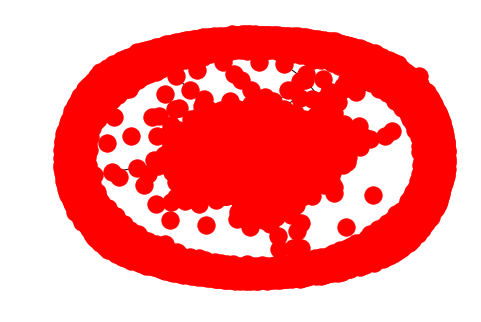

In [14]:
nx.draw(tree)
plt.show()

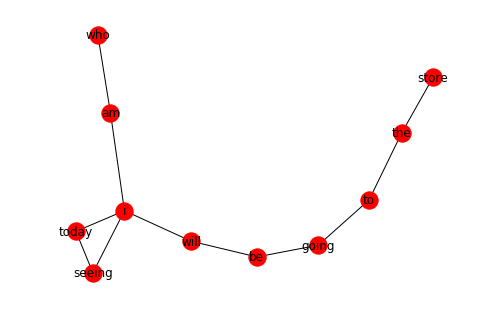

In [15]:
print(len(G.nodes))
print(len(R))

3843
2450
